In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data_2d = pd.read_csv('data_2d.csv')
data_mnist = pd.read_csv('mnist.csv')

In [2]:
def kmeans_with_elbow_method(data):
    distortion_values = []
    for i in range(1, 10):
        kmeans = KMeans(n_clusters=i, random_state=2, n_init=1, init='random', max_iter=4)
        y_km = kmeans.fit_predict(data_2d)
        distortion_values.append(kmeans.inertia_)
    return distortion_values

Text(0.5, 1.0, 'Elbow method')

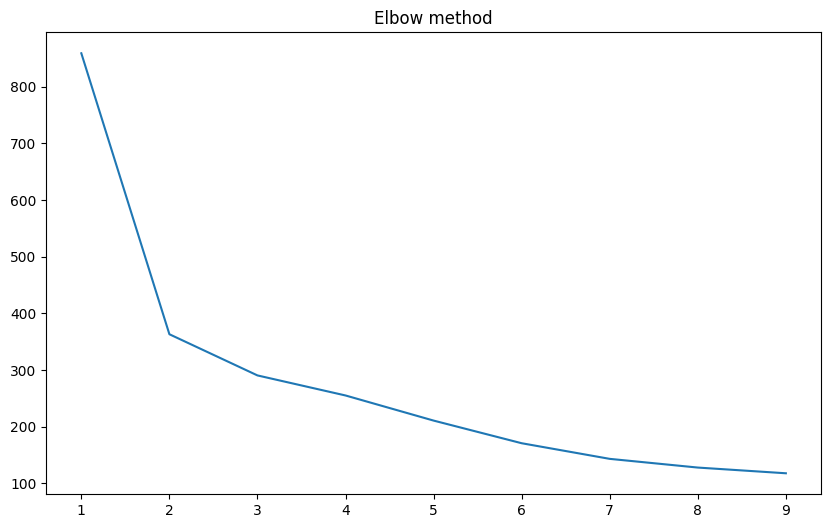

In [3]:
plt.figure(figsize=[10, 6])
plt.plot(range(1, 10), kmeans_with_elbow_method(data_2d))
plt.title('Elbow method')

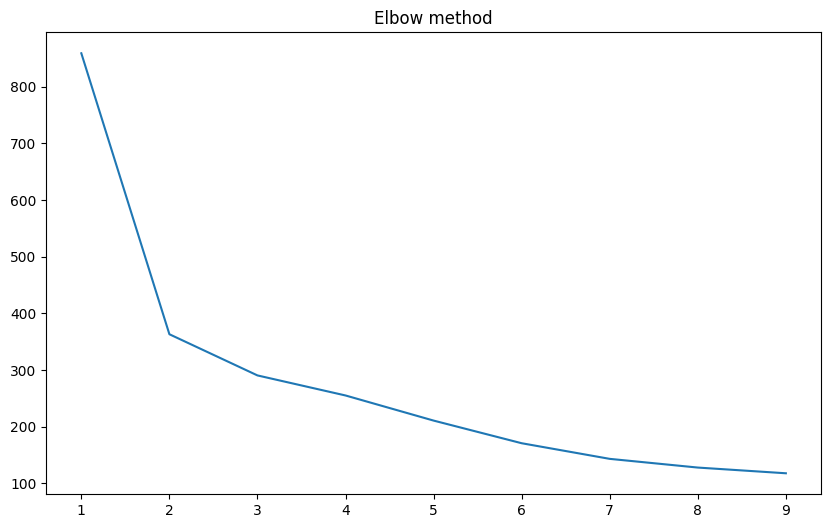

In [4]:
plt.figure(figsize=[10, 6])
plt.title('Elbow method')
plt.plot(range(1, 10), kmeans_with_elbow_method(data_mnist))

In [5]:
model_2d = KMeans(n_clusters=2, random_state=2, n_init=1, init='random', max_iter=4).fit(data_2d)
# model_mnist = KMeans(n_clusters=2, random_state=2, n_init=1, init='random', max_iter=4).fit(data_mnist)

Text(0.5, 1.0, 'Data_2d plot')

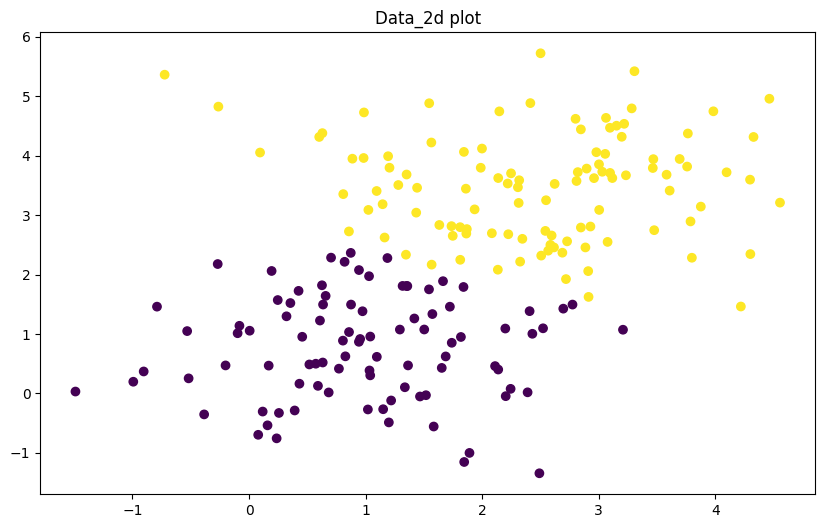

In [6]:
plt.figure(figsize=[10, 6])
plt.scatter(data_2d['-7.687164597386728637e-01'], data_2d['4.608603078297135447e-01'], c=model_2d.labels_)
plt.title('Data_2d plot')

In [7]:
data_mnist

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


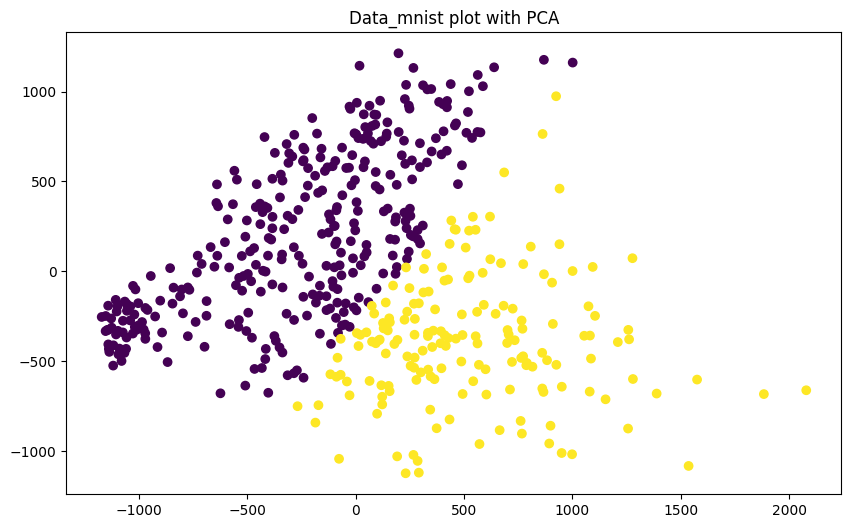

In [8]:
from sklearn.decomposition import PCA

pca_mnist = PCA(n_components=2).fit_transform(data_mnist)
data_mnist_pca = pd.DataFrame(pca_mnist)
kmeans_mnist_pca = KMeans(n_clusters=2, random_state=2, n_init=1, init='random', max_iter=4).fit(data_mnist_pca)
plt.figure(figsize=[10, 6])
plt.title('Data_mnist plot with PCA')
plt.scatter(data_mnist_pca[0], data_mnist_pca[1], c=kmeans_mnist_pca.labels_)